# Nuritionix Tracking API with Python Data Frames
## Using API requests and Python libraries to extract user data & reports from the nuritionix website

### Version 1.0
The goal of this project is to use Python to read API & CSV imported data from the Nuritionix app to a Data Frame. Then sort, clean and analyze the data to see if my current nutrition progress is meeting my fitness goals. It will demonstrate projected nutrition goals and will investigate whether changes will be needed to the current diet or maintain the same lifestyle. 


In [20]:
# Using csv import from extracted data to create DF

import pandas as pd
import numpy as np
import os, csv

df1 = pd.read_csv("foods.csv")

print(df1.head())

               Food Brand  Serving Quantity        Serving Unit  Calories  \
0         cold brew   NaN                 2       cup (8 fl oz)      4.74   
1        fried eggs   NaN                 2               large    180.32   
2             bagel   NaN                 1        medium bagel    277.20   
3  chicken and rice   NaN                 1                 cup    266.16   
4      frozen pizza   NaN                 1  package 8 oz pizza    533.32   

   Total Fat  Saturated Fat  Cholesterol  Sodium  Total Carbohydrate  \
0       0.10           0.00         0.00    9.48                0.00   
1      13.66           3.98       368.92  190.44                0.76   
2       1.39           0.38         0.00  443.10               55.00   
3       8.73           2.38        97.20  275.72               10.79   
4      24.44           8.50        27.86  889.53               57.75   

   Dietary Fiber  Sugars  Protein  Potassium       P          Consumed At  \
0           0.00    0.00   

In [ ]:
# Using the endpoint to access user account report totals

# Used to make HTTP Requests
import requests
# Used to access JSON libraries
import json
# Accessing Pandas library
import os, pandas as pd
# Import graphing tools
import matplotlib.pyplot as plt
# Import pickle library for saving the API data
import pickle

# API URL from Nutritionix
api_url1 = "URL"

# JSON Header information to connect to the API
with open('header.json', 'r') as file:
    headers = json.load(file)
    
# Check if the data is already saved locally using pickle
if os.path.exists('api_data.pickle'):
    with open('api_data.pickle', 'rb') as f:
        new_dict = pickle.load(f)
else:
    # Using the requests library to get the data from the user, using the above header information
    response = requests.get(api_url1, headers)

    # Gets the response and turns the JSON object into a dictionary
    data = response.json()

    # Access the 'dates' list and sort it based on the 'date' Key
    sorted_dates = sorted(data['dates'], key=lambda x: x['date'], reverse=True)

    # Create a new dictionary with 18 keys
    new_dict = {}

    # Iterate through the sorted dates and add information to the new dictionary
    for i, date_entry in enumerate(sorted_dates[:18]):
        key = f'date_{i + 1}'
        new_dict[key] = {
            'date': date_entry['date'],
            'total_cal': date_entry['total_cal'],
            'total_proteins': date_entry['total_proteins'],
            'total_carbs': date_entry['total_carbs'],
            'total_fat': date_entry['total_fat'],
            'total_sodium': date_entry['total_sodium'],
            'water_consumed_liter': date_entry['water_consumed_liter'],
            'avg_weight_kg': date_entry['avg_weight_kg'],
            'daily_kcal_limit': date_entry['daily_kcal_limit'],
            'daily_carbs_pct': date_entry['daily_carbs_pct'],
            'daily_fat_pct': date_entry['daily_fat_pct'],
            'daily_protein_pct': date_entry['daily_protein_pct'],
            'foods_logged': date_entry['foods_logged'],
            'exercises_logged': date_entry['exercises_logged'],
            'weights_logged': date_entry['weights_logged'],
            'notes': date_entry['notes'],
        }

    # Save the API data locally using pickle
    with open('api_data.pickle', 'wb') as f:
        pickle.dump(new_dict, f)

    # Close the response after saving the data
    response.close()
    
# Print the new dictionary
print(new_dict)

{'date_1': {'date': '2024-02-24', 'total_cal': 1877.08, 'total_proteins': 96.61, 'total_carbs': 198.93, 'total_fat': 77.56, 'total_sodium': 3329.33, 'water_consumed_liter': None, 'avg_weight_kg': None, 'daily_kcal_limit': 2000, 'daily_carbs_pct': None, 'daily_fat_pct': None, 'daily_protein_pct': None, 'foods_logged': 7, 'exercises_logged': None, 'weights_logged': None, 'notes': None}, 'date_2': {'date': '2024-02-23', 'total_cal': 2289.65, 'total_proteins': 110.13, 'total_carbs': 247.53, 'total_fat': 95.04, 'total_sodium': 2890.23, 'water_consumed_liter': None, 'avg_weight_kg': None, 'daily_kcal_limit': 2000, 'daily_carbs_pct': None, 'daily_fat_pct': None, 'daily_protein_pct': None, 'foods_logged': 7, 'exercises_logged': None, 'weights_logged': None, 'notes': None}, 'date_3': {'date': '2024-02-22', 'total_cal': 1690.74, 'total_proteins': 122, 'total_carbs': 132.93, 'total_fat': 72.03, 'total_sodium': 2850.35, 'water_consumed_liter': None, 'avg_weight_kg': None, 'daily_kcal_limit': 2000,

### Pandas Data Frame

In [4]:
# Turn the dictionary into a Data Frame
df = pd.DataFrame(new_dict)

print(df)

                          date_1      date_2      date_3      date_4  \
date                  2024-02-24  2024-02-23  2024-02-22  2024-02-21   
total_cal                1877.08     2289.65     1690.74     2047.92   
total_proteins             96.61      110.13         122       130.5   
total_carbs               198.93      247.53      132.93      149.55   
total_fat                  77.56       95.04       72.03       100.5   
total_sodium             3329.33     2890.23     2850.35     3611.07   
water_consumed_liter        None        None        None        None   
avg_weight_kg               None        None        None        None   
daily_kcal_limit            2000        2000        2000        2000   
daily_carbs_pct             None        None        None        None   
daily_fat_pct               None        None        None        None   
daily_protein_pct           None        None        None        None   
foods_logged                   7           7           7        

### Calculations & Graphing

- Parse the given data into a pandas DataFrame.
- Extract the row containing total calories.
- Sum up the total calories across all dates.
- Plot the total calories on a graph using a suitable visualization library like matplotlib or seaborn.

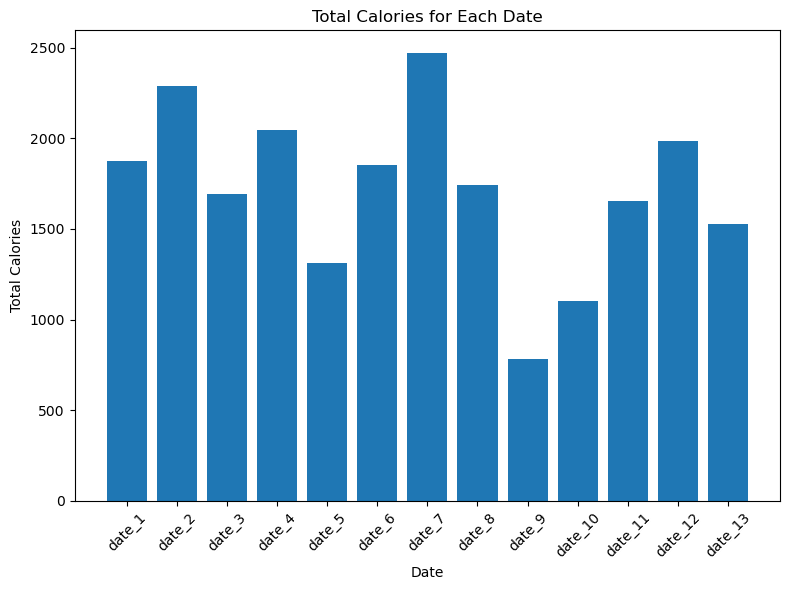

In [16]:
# Extract the "total_cal" row and drop the "date" index
total_cal_row = df.loc["total_cal"]

# Convert the values to float and sum up the total calories
total_cal = total_cal_row.astype(float).sum()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(total_cal_row.index, total_cal_row.values.astype(float))
plt.xlabel('Date')
plt.ylabel('Total Calories')
plt.title('Total Calories for Each Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()